In [1]:
%pylab inline
import convis

Populating the interactive namespace from numpy and matplotlib


Using gpu device 0: Quadro K620 (CNMeM is disabled, cuDNN not available)


In [23]:
m = convis.M()
m.resolution.steps_per_second = 1000.0
m.add_output(convis.filters.retina.GanglionSpikingLayerNode(m, {
            'sigma-V':0.1,
            'refr-mean__sec': 0.01,
            'refr-stdev__sec': 0.01, 'g-leak__Hz': 10.0}, name='spikes'))

In [24]:
m.create_function()

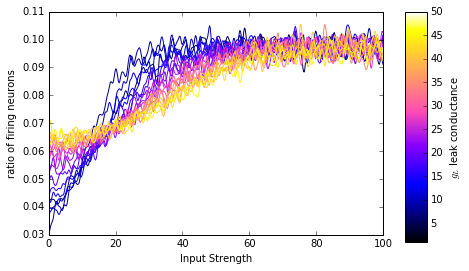

In [25]:
from scipy.ndimage import gaussian_filter1d
colors = cm.gnuplot2(np.linspace(0.1,0.9,20))
for i,g_l in enumerate(np.linspace(1.0,50.0,20)):
    m.clear_states()
    m.parameters.spikes.g_L.set_value(g_l)
    out = m.run(np.zeros((100,50,50)))
    inp_strength = 100.0*np.linspace(0,1.0,500)
    inp = inp_strength[:,np.newaxis,np.newaxis]*np.ones((1,50,50))
    out = m.run(inp)
    plot(inp_strength,gaussian_filter1d(out[0].mean((1,2)),2.0),color=colors[i])
    #plot(inp_strength,out[0].reshape((out[0].shape[0],-1))[:,::10],'o',alpha=0.1)
xlabel('Input Strength')
ylabel('ratio of firing neurons')
cb1 = mpl.colorbar.ColorbarBase(gcf().add_axes([0.95, 0.1, 0.05, 0.8]), 
                                cmap=cm.gnuplot2,
                                norm=mpl.colors.Normalize(vmin=1.0, vmax=50.0),
                                orientation='vertical')
cb1.set_label('$g_L$ leak conductance')